In [1]:
from jupyterthemes import jtplot
jtplot.style()

# House Prices 
Data set is [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import os
TRAIN_PATH = 'datasets/house_price'
TEST_PATH = 'datasets/house_price'
def load_houses_data(TRAIN_PATH=TRAIN_PATH, TEST_PATH=TEST_PATH):
    train_csv = os.path.join(TRAIN_PATH, 'train.csv')
    test_csv = os.path.join(TEST_PATH, 'test.csv')
    return pd.read_csv(train_csv), pd.read_csv(test_csv)

In [4]:
X_train, X_test = load_houses_data()
y_train = X_train['SalePrice']

In [5]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
X_train.std()

Id                 421.610009
MSSubClass          42.300571
LotFrontage         24.284752
LotArea           9981.264932
OverallQual          1.382997
OverallCond          1.112799
YearBuilt           30.202904
YearRemodAdd        20.645407
MasVnrArea         181.066207
BsmtFinSF1         456.098091
BsmtFinSF2         161.319273
BsmtUnfSF          441.866955
TotalBsmtSF        438.705324
1stFlrSF           386.587738
2ndFlrSF           436.528436
LowQualFinSF        48.623081
GrLivArea          525.480383
BsmtFullBath         0.518911
BsmtHalfBath         0.238753
FullBath             0.550916
HalfBath             0.502885
BedroomAbvGr         0.815778
KitchenAbvGr         0.220338
TotRmsAbvGrd         1.625393
Fireplaces           0.644666
GarageYrBlt         24.689725
GarageCars           0.747315
GarageArea         213.804841
WoodDeckSF         125.338794
OpenPorchSF         66.256028
EnclosedPorch       61.119149
3SsnPorch           29.317331
ScreenPorch         55.757415
PoolArea  

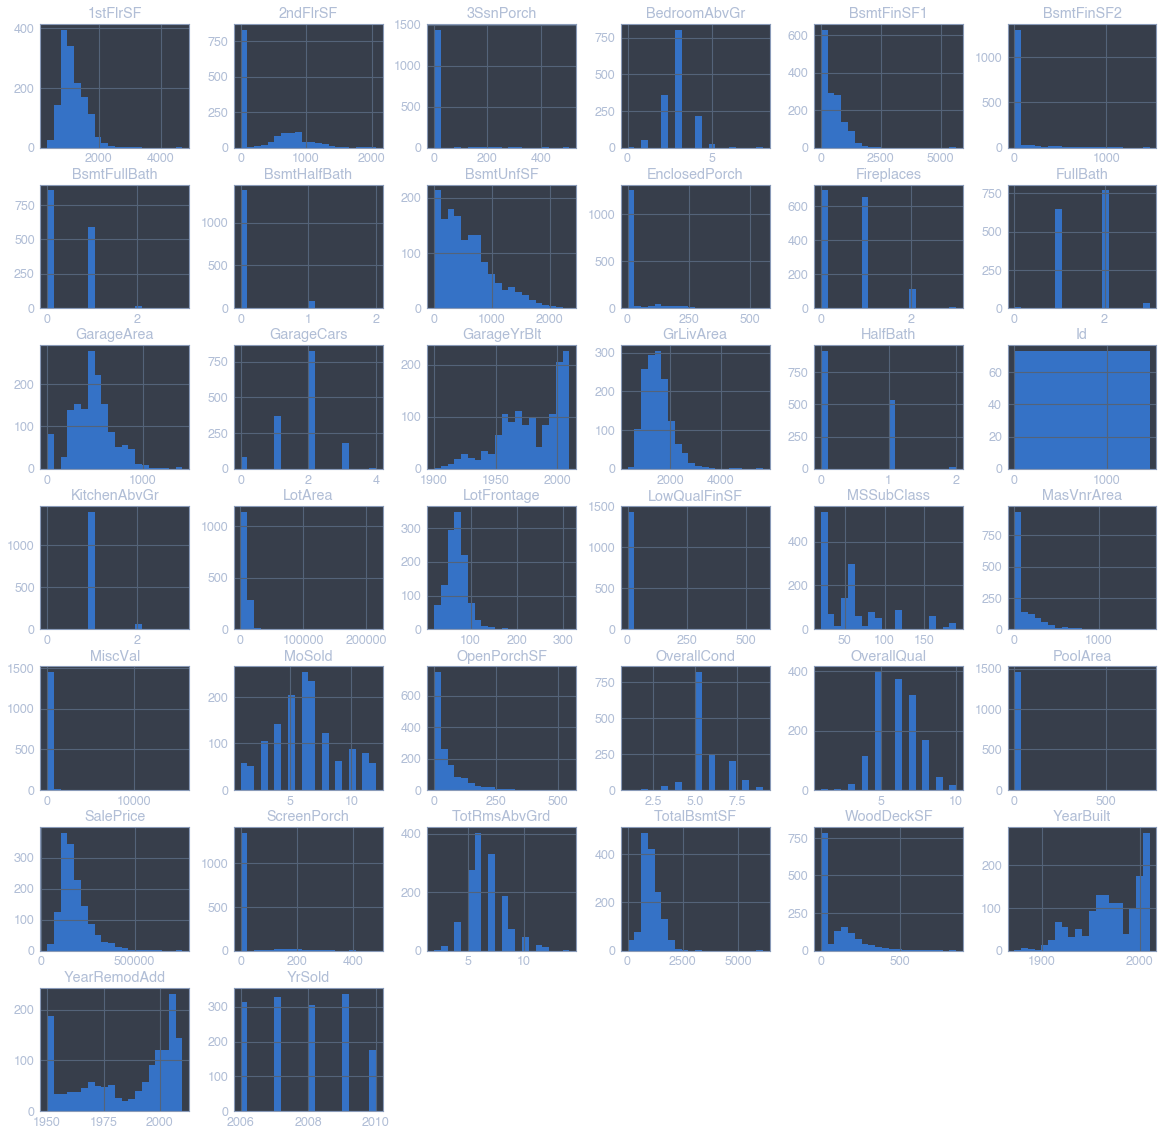

In [8]:
X_train.hist(figsize=(20, 20), bins=20)
plt.show()

In [9]:
X_train['3SsnPorch'].describe()

count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

In [10]:
np.unique(X_train['BedroomAbvGr'].values)

array([0, 1, 2, 3, 4, 5, 6, 8])

In [11]:
X_train.groupby('BedroomAbvGr').count()['Id']

BedroomAbvGr
0      6
1     50
2    358
3    804
4    213
5     21
6      7
8      1
Name: Id, dtype: int64

In [12]:
X_train.groupby('BsmtFullBath').count()['Id']

BsmtFullBath
0    856
1    588
2     15
3      1
Name: Id, dtype: int64

In [13]:
X_train[['TotalBsmtSF', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF']].head()

,TotalBsmtSF,BsmtFinSF2,BsmtFinSF1,BsmtUnfSF
0,856,0,706,150
1,1262,0,978,284
2,920,0,486,434
3,756,0,216,540
4,1145,0,655,490


In [14]:
X_train[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].describe()

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,46.660274,21.954110,3.409589,15.060959
std,66.256028,61.119149,29.317331,55.757415
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000
75%,68.000000,0.000000,0.000000,0.000000
max,547.000000,552.000000,508.000000,480.000000


In [15]:
X_train[['GarageType']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
GarageType    1379 non-null object
dtypes: object(1)
memory usage: 11.5+ KB


In [16]:
X_train.groupby('GarageFinish').count()['Id'] # Let it be in our dataset

GarageFinish
Fin    352
RFn    422
Unf    605
Name: Id, dtype: int64

In [17]:
X_train.corr()['GarageArea']['GarageCars']

0.8824754142814603

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125970550>]],
      dtype=object)

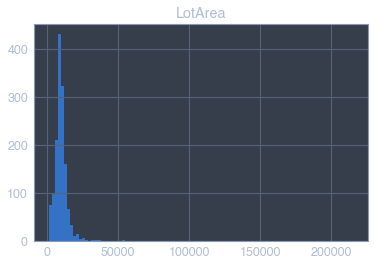

In [18]:
X_train[['LotArea']].hist(bins=100)

In [19]:
X_train.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122320b38>]],
      dtype=object)

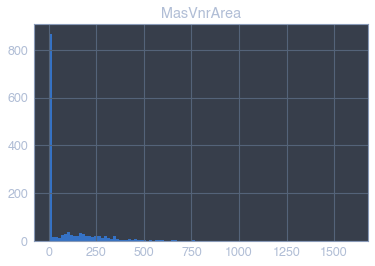

In [20]:
X_train[['MasVnrArea']].hist(bins=100)

* should drop id.
* almost all 3SsnPorch are zero and we can delete it.
* we can group rooms 5 or more into one single column.
* can merge full and half bathrooms into one filed name bathroom
* we can drop two type of finished and have one finished basement feet
* we can change basement unfinished into a fraction of finished/unfinished (It got bad correlation)
* can merge porchs into one field.
* garage year built can be droped and have a single year built for house.
* we could have just garage area between cars and area.
* we cad drop kitchen also. becasue a bunch of them are one.
* can filter Lot Area above 50000 to 50001
* we **can** drop MSSubClass, OverallCond, YrSold, LowQualFinSF, Id, MiscVal, BsmtHalfBath, BsmtFinSF2, 3SsnPorch, MoSold, PoolArea because of their corrolation
* It's not important when it was sold. So we drop MoSold and YrSold.
* Overall Qual is important but Overall cond not!
* We can add a luxury style field to show having pool or not and other fantasy features.
* we can have just one of YearRemodAdd or YearBuilt.


In [21]:
label_attrs = X_train.select_dtypes([object]).columns.values
num_attrs = X_train.select_dtypes([np.int64, np.float64]).columns.values
num_attrs = num_attrs[~(num_attrs == 'SalePrice')]

In [22]:
X_train_label = X_train[label_attrs]
X_train_num = X_train[num_attrs]

## Work With Numbers

### Merge FullBath and HalfBath

In [23]:
from sklearn.base import TransformerMixin, BaseEstimator
class MergeBath(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self;
    def transform(self, X, y=None):
        X = X.copy()
        X['Bath'] = X['HalfBath'] + X['FullBath']
        X['BsmtBath'] = X['BsmtHalfBath'] + X['BsmtFullBath']
        X = X.drop(['HalfBath', 'FullBath', 'BsmtHalfBath', 'BsmtFullBath'], axis=1)
        return X
X_num_merged = MergeBath().transform(X_train_num)

### Merge BsmntFS and add Unfinished Fraction

In [24]:
class MergeBsmntFs(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self;
    def transform(self, X, y=None):
        X = X.copy()
        X['BsmtFinSF'] = X['BsmtFinSF1'] + X['BsmtFinSF2']
        X.drop(['BsmtFinSF1', 'BsmtFinSF2'], axis=1, inplace=True)
        return X
X_num_bsmnt_proved = MergeBsmntFs().transform(X_num_merged)

### Merge Porchs 

In [25]:
class MergePorches(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self;
    def transform(self, X, y=None):
        X = X.copy()
        X['Porch'] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['3SsnPorch'] + X['ScreenPorch']
        X.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)
        return X
X_num_porch_merged = MergePorches().transform(X_num_bsmnt_proved)

### Filter Lot Area above 50000 and Room above 5

In [26]:
class FilterLotAreaAndRooms(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self;
    def transform(self, X, y=None):
        X = X.copy()
        X['LotArea'] = X['LotArea'].apply(lambda l: 50001 if l > 50000 else l)
        X['BedroomAbvGr'] = X['BedroomAbvGr'].apply(lambda l: 5 if l > 5 else l)
        return X
X_num_lot_filtered = FilterLotAreaAndRooms().transform(X_num_porch_merged)

### Dropping 

In [27]:
class DataFrameDropper(BaseEstimator, TransformerMixin):
    def __init__(self, drop_attrs=[]):
        self.drop_attrs = drop_attrs
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.copy()
        X.drop(self.drop_attrs, axis=1, inplace=True, errors='ignore')
        return X

In [28]:
num_drop_attrs = ['Id', 'GarageCars', 'MSSubClass', 'OverallCond', 'YrSold', 'LowQualFinSF',
              'MiscVal', 'MoSold', 'PoolArea', 'YearRemodAdd', 'SalePrice']
X_num_dropped = DataFrameDropper(num_drop_attrs).transform(X_num_lot_filtered)

## Work With Labels

In [29]:
X_train_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422

### Dropping very null attributes

In [30]:
label_drop_attrs = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'] # Think about FireplaceQu
X_label_dropped = DataFrameDropper(label_drop_attrs).transform(X_train_label)

### Impute

In [31]:
from sklearn.impute import SimpleImputer
X_label_imputed = pd.DataFrame(SimpleImputer(strategy="most_frequent").fit_transform(X_label_dropped.values),
                               columns=X_label_dropped.columns)

### Encoding Label

In [32]:
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, OneHotEncoder, OrdinalEncoder
encoder = OrdinalEncoder()
X_label_encoded = pd.DataFrame(OrdinalEncoder().fit_transform(X_label_imputed), columns=X_label_imputed.columns)

### Analys Labels

In [33]:
X_label_analys = X_label_encoded.copy()
X_label_analys['PriceSale'] = y_train.values

In [34]:
X_label_analys.corr()['PriceSale'].sort_values()

ExterQual       -0.636884
BsmtQual        -0.618025
KitchenQual     -0.589189
GarageFinish    -0.537242
HeatingQC       -0.400178
GarageType      -0.302105
BsmtExposure    -0.295407
LotShape        -0.255580
MSZoning        -0.166872
Heating         -0.098812
BsmtFinType1    -0.092106
BldgType        -0.085591
LotConfig       -0.067396
SaleType        -0.054911
Utilities       -0.014314
Condition2       0.007513
LandContour      0.015453
MasVnrType       0.018216
BsmtFinType2     0.033235
Street           0.041036
LandSlope        0.051152
BsmtCond         0.052563
Condition1       0.091155
GarageQual       0.098759
Exterior1st      0.103551
Exterior2nd      0.103766
Functional       0.115328
ExterCond        0.117303
RoofMatl         0.132383
GarageCond       0.134740
HouseStyle       0.180163
Neighborhood     0.210851
SaleCondition    0.213092
RoofStyle        0.222405
PavedDrive       0.231357
Electrical       0.234945
CentralAir       0.251328
Foundation       0.382479
PriceSale   

We can drop MSZoning, Heating, BsmtFinType1, BldgType, LotConfig, SaleType, Utilities, Condition2, LandContour, MasVnrType, BsmtFinType2, Street, LandSlope, BsmtCond, Condition1, GarageQual, Exterior1st, Exterior2nd, Functional, ExterCond, RoofMatl, GarageCond, HouseStyle becasue of their correlation

In [35]:
label_new_drop_attrs = label_drop_attrs + [ 'MSZoning', 'Heating', 'BsmtFinType1', 'BldgType', 'LotConfig', 'SaleType', 'Utilities',
                         'Condition2', 'LandContour', 'MasVnrType', 'BsmtFinType2', 'Street', 'LandSlope', 'BsmtCond',
                         'Condition1', 'GarageQual', 'Exterior1st', 'Exterior2nd', 'Functional', 'ExterCond', 'RoofMatl',
                         'GarageCond', 'HouseStyle']
X_label_new_analys = DataFrameDropper(label_new_drop_attrs).transform(X_label_analys)

## Create Pipeline 

In [36]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attrs):
        self.attrs = attrs
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.loc[:, self.attrs]

In [60]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([
    ('selection', DataFrameSelector(num_attrs)),
    ('merge_bath', MergeBath()),
    ('merge_bsmnt', MergeBsmntFs()),
    ('merge_porch', MergePorches()),
    ('filter', FilterLotAreaAndRooms()),
    ('drop', DataFrameDropper(num_drop_attrs)),
    ('impute', SimpleImputer()),
    ('std_scale', StandardScaler()),
])

label_pipeline = Pipeline([
    ('selection', DataFrameSelector(label_attrs)),
    ('drop', DataFrameDropper(label_new_drop_attrs)),
    ('impute', SimpleImputer(strategy="most_frequent")),
    ('encode', OrdinalEncoder()), # one hot is better 
    ('std_scale', StandardScaler()),
])

full_pipeline = FeatureUnion([
    ('num_pipline', num_pipeline),
    ('label_pipeline', label_pipeline),
])


X_train_cleaned = pd.DataFrame(full_pipeline.fit_transform(X_train))

## Train Linear Reggression

In [61]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_cleaned, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
def analys_model(model):
    some_data = X_train.iloc[:5]
    some_label = y_train.iloc[:5]
    some_data_prepared = full_pipeline.transform(some_data)
    print(f"Predictions are {model.predict(some_data_prepared)}")
    print(f"Lables are {list(some_label)}")
    housing_prediction = model.predict(X_train_cleaned)
    scores = cross_validate(model, X_train_cleaned, y_train, scoring="neg_mean_squared_error", cv=3)
    rmse_scores = np.sqrt(-scores['test_score'])
    print(f"Scores : {rmse_scores}")
    print(f"Mean : {rmse_scores.mean()}")
    print(f"Standard Deviation : {rmse_scores.std()}")

In [63]:
analys_model(linear_model)

Predictions are [216554.46120887 181115.72322031 224989.87844391 173738.80715274
 292470.2952845 ]
Lables are [208500, 181500, 223500, 140000, 250000]
Scores : [28701.7398613  35983.84093344 41480.39416942]
Mean : 35388.65832138628
Standard Deviation : 5233.8120739363585


## Train Random Forest Reggression

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_cleaned, y_train)
analys_model(rf_model)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Predictions are [210980. 177520. 218170. 156510. 260373.]
Lables are [208500, 181500, 223500, 140000, 250000]
Scores : [28752.86156923 34369.66433868 32209.51537551]
Mean : 31777.347094472698
Standard Deviation : 2313.3230650665405


In [66]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
max_features = ['auto', 1, 2, 3, 4, 5, 6, 7]
max_depth = [int(x) for x in np.linspace(1, 110, num = 24)]
# max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestRegressor()

In [68]:
random_search =  RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                                    n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring="neg_mean_squared_error")
random_search.fit(X_train_cleaned, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.3min finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [73]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=57,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1577,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [70]:
best_model = random_search.best_estimator_
best_model.fit(X_train_cleaned, y_train)
analys_model(best_model)

Predictions are [208500. 181500. 223500. 140000. 250000.]
Lables are [208500, 181500, 223500, 140000, 250000]
Scores : [24465.09840825 29904.30466863 27488.37437053]
Mean : 27285.92581580354
Standard Deviation : 2225.156211553736


# Sumbit Test Set

In [71]:
X_test_clean = full_pipeline.transform(X_test)
predictions = best_model.predict(X_test_clean)
final_prediction = pd.DataFrame({'Id': X_test['Id'],
                                'SalePrice': predictions})

In [72]:
answer_csv = os.path.join(TEST_PATH, 'test_answer.csv')
final_prediction.to_csv(answer_csv, index=False)